In [13]:
import pandas as pd
import ipywidgets as widgets
import base64

In [14]:
# reading csv
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ITLYTy36uuZTALDX42jZiCTn8LZV-YEj')

In [15]:
df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
...,...,...,...,...,...,...,...
29099,TO,9219390289657798803,S,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29100,TO,9219390289657798803,XL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29101,TO,9219390289657798803,XS,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29102,TO,9219390289657798803,XXL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...


# Subselecting by group characteristic
We are going to select only the rows whose item id has a total sum stock quantity < 5.

In order to do that we'll need to work out which item ids satisfy that condition and then use the item ids to filter the actual dataframe.

In [16]:
item_tot_stock = df.groupby('item_id').stock_quantity.sum()
item_tot_stock

item_id
-9211454783299887107      0
-9196712795451291394      0
-9195690731018983398      0
-9193583659629675556      0
-9191417078785560471      0
                       ... 
 9203047692451691870      0
 9203722658108695210    311
 9204604016320963459    131
 9217331469375676294    169
 9219390289657798803      2
Name: stock_quantity, Length: 3121, dtype: int64

In [17]:
item_tot_stock<5

item_id
-9211454783299887107     True
-9196712795451291394     True
-9195690731018983398     True
-9193583659629675556     True
-9191417078785560471     True
                        ...  
 9203047692451691870     True
 9203722658108695210    False
 9204604016320963459    False
 9217331469375676294    False
 9219390289657798803     True
Name: stock_quantity, Length: 3121, dtype: bool

In [18]:
item_tot_stock[item_tot_stock<5]

item_id
-9211454783299887107    0
-9196712795451291394    0
-9195690731018983398    0
-9193583659629675556    0
-9191417078785560471    0
                       ..
 9171242694638783940    2
 9195293150087703907    0
 9200763438426804191    0
 9203047692451691870    0
 9219390289657798803    2
Name: stock_quantity, Length: 1767, dtype: int64

In [19]:
low_stock_items = item_tot_stock[item_tot_stock<5].index
low_stock_items

Int64Index([-9211454783299887107, -9196712795451291394, -9195690731018983398,
            -9193583659629675556, -9191417078785560471, -9186786591870444796,
            -9180495518760579244, -9163679137772189306, -9148411514774668682,
            -9147610867401757543,
            ...
             9147821294843958734,  9153607217089266001,  9160519113061011451,
             9161396202393900812,  9162311958422134074,  9171242694638783940,
             9195293150087703907,  9200763438426804191,  9203047692451691870,
             9219390289657798803],
           dtype='int64', name='item_id', length=1767)

In [20]:
mask = df['item_id'].isin(low_stock_items)
low_stock_df = df[mask]
low_stock_df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
...,...,...,...,...,...,...,...
29099,TO,9219390289657798803,S,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29100,TO,9219390289657798803,XL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29101,TO,9219390289657798803,XS,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29102,TO,9219390289657798803,XXL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...


# Pandas Subsetting Basics

In [ ]:
df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
...,...,...,...,...,...,...,...
29099,TO,9219390289657798803,S,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29100,TO,9219390289657798803,XL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29101,TO,9219390289657798803,XS,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29102,TO,9219390289657798803,XXL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...


In [ ]:
ser = [7,3,4]

# result = []
# for i in ser:
#   result.append(i == 3)

result = [i == 3 for i in ser]

result

[False, True, False]

In [ ]:
d = df.set_index('size').iloc[:5]
d

,category,item_id,color_long,price,stock_quantity,image
size,,,,,,
L,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
M,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XXL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
L,JK,-9211454783299887107,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...


In [ ]:
mask = (d['color_long'] == 'AQUA')
d[mask]

,category,item_id,color_long,price,stock_quantity,image
size,,,,,,
L,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
M,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XXL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...


In [ ]:
# same as this
d[d['color_long'] == 'AQUA']

,category,item_id,color_long,price,stock_quantity,image
size,,,,,,
L,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
M,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
XXL,JK,-9211454783299887107,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...


In [ ]:
pd.Series([[1,2],[454,6,456]])

0           [1, 2]
1    [454, 6, 456]
dtype: object

In [ ]:
x = pd.DataFrame({
    'a': [8494,9646,65,41],
    'b': ['fae','gra','gar','gar']
}, index=[8,5,7,2])
x

,a,b
8,8494,fae
5,9646,gra
7,65,gar
2,41,gar


In [ ]:
x.loc[5]            # select row by label
x.iloc[1]           # select row by position
x[[False, True, False, False]]   # selecting row by mask

,a,b
5,9646,gra


In [ ]:
x.loc[:, 'a']  # select by column label (or the shortcut x['a'])
x.iloc[:, 0]   # select by column position

8    8494
5    9646
7      65
2      41
Name: a, dtype: int64

In [ ]:
is_gar = x['b']=='gar'
is_high_a = x['a'] > 50

x[is_gar & is_high_a]

,a,b
7,65,gar


# Creating the User Interface (UI)

In [30]:
for item_id, sub_df in low_stock_df.groupby('item_id'):
  break

# sub_df

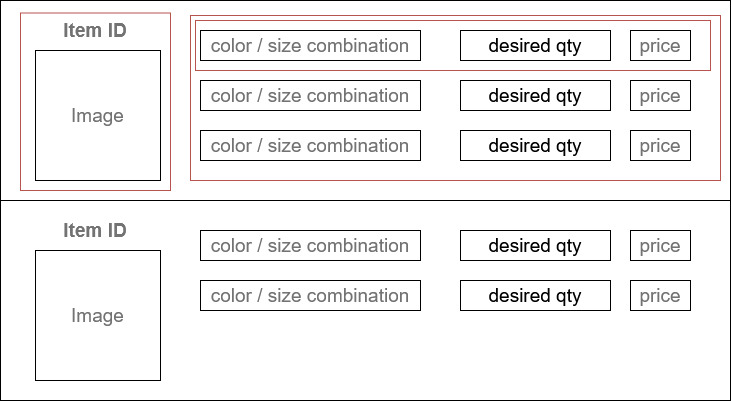

In [31]:
def render_boxes_content(item_group):
    item_id = item_group.item_id.iloc[0]  # first item_id (all the same)
    image_url = item_group.image.iloc[0]  # first image_url (all the same)
    
    # left column
    col1_html = f'<h1>{item_id}</h1><br><img src="{image_url}"></img>'
    column1 = widgets.HTML(col1_html)

    # right column
    col2_rows = []
    for _, row in item_group.iterrows():
        name = f"{row.category} {row.color_long} {row['size']}"
        col2_row = widgets.HBox([
          widgets.Label(name), 
          widgets.IntText(row.stock_quantity),
          widgets.Label(str(row.price)),
        ])
        col2_rows.append(col2_row)

    column2 = widgets.VBox(col2_rows, layout=widgets.Layout(padding='30px'))

    # combining both
    return widgets.HBox([column1, column2])

render_boxes_content(sub_df)

# Review of Classes

In [ ]:
def bark():
  print("NOPE")

class Dog:
  sound = 'bark'  # class property (data attached to class)

  def __init__(self, color='black', age_in_dog_years=0):
    self.color = color  # instance property (data attached to class instance)
    self.age_in_human_years = age_in_dog_years*7

  def bark(self):  # method (function attached to class)
    print(f'{sound} {sound}')

  def roll(self):
    print("roll")

  def get_color_and_sound(self):
    return self.color, self.sound

In [ ]:
d = Dog(age_in_dog_years=3)
d.age_in_human_years

21

In [ ]:
d.age_in_dog_years

AttributeError: ignored

In [ ]:
Dog.color # returns an error because the CLASS has no attribute 'color'
Dog.sound # return 'bark' because the CLASS has that attribute 

Dog().sound  # return 'bark'
Dog().color  # returns 'black' (default color)

AttributeError: ignored

In [ ]:
fido = Dog(color='red')   # creating an instance (object) of the class
fido.get_color_and_sound()

('red', 'bark')

In [ ]:
pluto = Dog(color='orange')
pluto.get_color()

'orange'

In [ ]:
fido.roll_and_bark()

NOPE


In [ ]:
fido.get_color()

'black'

## more on classes ...

In [11]:
class Address:
    def __init__(self, name, street, city, state, zip=""):
        self.name = name
        self.street = street
        self.city = city
        self.state = state
        self.zip = zip

    def __eq__(self, other):
      return (self.street == other.street) and (self.city == other.city) and (self.state == other.state)
    
    def __repr__(self):
      return f"{self.name} lives in {self.city} ({self.state})"
    
    def get_full_address(self, prefix=''):
      return f"{prefix}{self.street}, {self.city}, {self.state}"

        
 
# Create another address
vacation_home_address = Address(
    name = "John Smith",
    street = "1122 Main Street",
    city = "Panama City Beach",
    state = "FL",
)

vacation_home_address2 = Address(
  name = "Adam Blue",
  street = "1122 Main Street",
  city = "Panama City Beach",
  state = "FL",
)
 

vacation_home_address == vacation_home_address2

vacation_home_address.get_full_address()

'1122 Main Street, Panama City Beach, FL'

In [12]:
vacation_home_address.get_full_address("My Address: ")

'My Address: 1122 Main Street, Panama City Beach, FL'

`display` comes from this import below, which is done for you when running a jupyter notebook: 
```python
from IPython.display import display
```

# InventoryDashboard
Finally we get to the Dashboard class!

In [49]:
class InventoryDashboard:
  """
  Class that shows an interactive dashboard of products with the ability to amend
  quantities and export the amended data as csv
  """

  def __init__(self, df, row_per_page=2):
    """Defining the initial state of the instance"""
    self.df = df.copy()   # to avoid the SettingWithCopyWarning
    self.starting_row = 0
    self.row_per_page = row_per_page
    self.out = widgets.Output()
    display(self.out)
    self.define_header()
    self.render()

  def render(self):
    """Clears the output and display the rows"""
    self.out.clear_output(wait=True)
    with self.out:
        display(self.get_rows())

  def get_n_group(self, n):
    """Finds the n-th unique id and gets all the rows that have that id"""
    item_id = self.df.item_id.unique()[n]

    # self.df[self.df['item_id'] == item_id]
    return self.df.groupby('item_id').get_group(item_id)

  def get_rows(self):
    """Creates the widgets contining the header and item rows"""
    self.boxes = []
    for n in range(self.starting_row, self.starting_row+self.row_per_page):
        item_group = self.get_n_group(n)
        box = render_boxes_content(item_group)
        box.idx = item_group.index
        self.boxes.append(box)

    vbox_content = [self.header] + self.boxes
    return widgets.VBox(vbox_content)

  def define_header(self):
    """Creates the button header and defines what should happen when buttons are clicked"""
    prev_btn = widgets.Button(description="Prev")
    next_btn = widgets.Button(description="Next")
    export_btn = widgets.Button(description="Export Order", button_style='danger')
    page_idx_lbl = widgets.Label(f"{self.starting_row} - {self.starting_row+self.row_per_page}")

    # callbacks (function triggered when buttons are clicked)
    def _prev(b):
        self.store_values()
        self.starting_row -= self.row_per_page
        if self.starting_row < 0: 
            self.starting_row = 0
        page_idx_lbl.value = f"{self.starting_row} - {self.starting_row+self.row_per_page}"
        self.render()
    def _next(b):
        self.store_values()
        self.starting_row += self.row_per_page
        page_idx_lbl.value = f"{self.starting_row} - {self.starting_row+self.row_per_page}"
        self.render()
    def _export(b):
        self.store_values()
        self.create_download_url()

    # definig the callbacks
    prev_btn.on_click(_prev)
    next_btn.on_click(_next)
    export_btn.on_click(_export)

    self.header = widgets.HBox([prev_btn, next_btn, export_btn, page_idx_lbl])

  def store_values(self):
    """saves the input box values"""
    for box in self.boxes:
        values = []
        for row in box.children[1].children:
            values.append(row.children[1].value)
        self.df.loc[box.idx, 'stock_quantity'] = values

  def create_download_url(self):
    """Clears the dashboard and presents a download button to download the amended data"""
    self.out.clear_output(wait=True)
    dwld = widgets.HTML(value='')
    
    fp = 'export.csv'
    self.df.to_csv(fp)
    
    with open(fp, "rb") as f:
        data = f.read()
    b64 = base64.b64encode(data)
    payload = b64.decode()

    dwld.value = f'<a download="{fp}" href="data:text/csv;base64,{payload}" target="_blank">Click here to download</a>'
    
    with self.out:
        display(dwld)

dashboard = InventoryDashboard(df=low_stock_df, row_per_page=2)

Output()